In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("bodyPerformance.csv")
X = data.loc[:,('age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm')]
X = pd.get_dummies(X, prefix='gender', columns=['gender'])
y = data['class']
print("Label kelas : ", np.unique(y))

Label kelas :  ['A' 'B' 'C' 'D']


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-7.17432115e-01  4.43872976e-01  6.52150023e-01 -2.67366553e-01
   1.12008898e-01 -1.59593723e-02  1.68819029e+00  3.77317337e-01
   1.41696147e+00  6.74008621e-01 -7.62750365e-01  7.62750365e-01]
 [-8.64219697e-01 -4.22465483e-01 -9.74734380e-01 -1.03908068e+00
  -1.67278271e-01 -2.87820319e-01 -5.30734746e-02  1.28983577e-01
   9.26633723e-01  9.75013135e-01 -7.62750365e-01  7.62750365e-01]
 [-4.23856952e-01  1.31021144e+00  8.83127438e-01 -4.32733865e-01
   1.22915757e+00  1.47927584e+00  7.37554395e-01 -3.79509362e-01
   6.46446438e-01 -2.29004922e-01 -7.62750365e-01  7.62750365e-01]
 [-3.50463161e-01  7.04961279e-01  3.05683900e-01 -6.67004225e-01
  -2.60373993e-01  1.13944965e+00  4.17538353e-01 -1.09601212e-03
   9.26633723e-01  7.24176040e-01 -7.62750365e-01  7.62750365e-01]
 [-6.44038324e-01  6.21887728e-01  2.11465044e-02 -8.46152146e-01
  -8.18948330e-01 -2.19855083e-01  6.15195320e-01  1.40612863e+00
   3.66259153e-01  6.74008621e-01 -7.62750365e-01  7.62750365e-01]]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 0.38347475 -1.17012744 -1.0667906  -0.03309619  1.32225329  1.00351918
  -0.18484479  0.10533274  0.36625915  0.44825524 -0.76275036  0.76275036]
 [-0.8642197   0.33706413  0.1634152  -1.03908068  0.76367896  0.73165823
   0.39871388  0.44826984  0.36625915  1.05026426 -0.76275036  0.76275036]
 [ 1.99813815 -0.57674493 -0.13785969  1.28984231  0.9498704   1.61520631
  -0.87193805 -0.26125519 -1.38491138 -2.11028314 -0.76275036  0.76275036]
 [-0.57064453  1.31021144  1.64468341 -0.0468768   0.67058323  0.59572776
   0.88815018 -0.72244646  0.43630597  0.44825524 -0.76275036  0.76275036]
 [-1.01100728 -0.75475969 -0.49771581 -1.70054993 -0.53966116 -1.10340316
  -0.10013466 -0.49776353  1.06672737  1.42651991 -0.76275036  0.76275036]]
y Training: 5721     A
463      B
11129    C
8649     C
2759     C
Name: class, dtype: object


In [6]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [7]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 9.75101010e-01  9.96714809e-03 -6.01918145e-01 -1.01890541e-02
  -1.04685124e-03 -8.09940557e-03  7.75010399e-01  1.37299262e+00
   1.37853762e+00  5.87764954e-01  5.42836535e-01 -5.42836535e-01]
 [ 1.19410565e+00  5.35020727e-02 -9.19320736e-01  7.11391557e-02
  -1.12751048e-01  9.68366071e-02  9.60548400e-01  1.52974552e+00
   1.78276401e+00  5.79951741e-01  5.76036459e-01 -5.76036459e-01]
 [ 1.12133316e+00  2.12183656e-01 -1.05693937e+00 -1.55855502e-01
  -1.19700671e-01  8.91435790e-02  7.74989742e-01  1.54287666e+00
   1.75552050e+00  5.35206380e-01  5.19804774e-01 -5.19804774e-01]
 [ 8.88653671e-01 -2.18126872e-01 -2.78986195e-01  1.60931583e-02
  -7.25827634e-02  3.40299426e-02  5.16997077e-01  1.07143329e+00
   1.22417679e+00  5.18841452e-01  3.66493279e-01 -3.66493279e-01]
 [ 1.07736217e+00  1.07233187e-01 -8.74220340e-01 -2.52227306e-01
  -5.70114503e-02 -1.08890993e-02  6.69526458e-01  1.35014424e+00
   1.53116142e+00  4.00919695e-01  3.95717756e-01 -3.

In [8]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['A' 'C' 'B' ... 'B' 'B' 'A']


Akurasi : 63.812842210054754 %


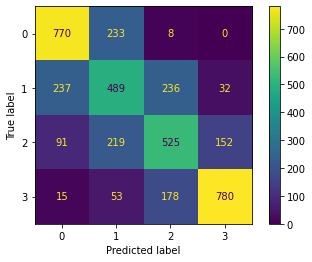

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))